In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_features_modified.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_labels.csv')

In [61]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn_multi.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.3113793103448276
Confusion Matrix
 [[1442    6   10 ...    2    4    2]
 [  29    4    0 ...    0    0    0]
 [  27    0    0 ...    0    0    0]
 ...
 [  26    0    0 ...    2    0    0]
 [  22    1    0 ...    0    1    0]
 [  30    0    0 ...    0    0    1]]


### Evaluation Metrics

In [65]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [66]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [67]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.22555682554349696
Recall: 0.3113793103448276


In [68]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.37      0.75      0.49      1932
           0       0.11      0.09      0.10        44
           1       0.00      0.00      0.00        45
           2       0.22      0.23      0.22        43
           3       0.09      0.08      0.09        36
           4       0.03      0.02      0.03        50
           5       0.20      0.13      0.16        38
           6       0.10      0.10      0.10        52
           7       0.11      0.07      0.09        41
           8       0.21      0.17      0.19        41
           9       0.00      0.00      0.00        50
          10       0.08      0.05      0.06        41
          11       0.00      0.00      0.00        35
          12       0.38      0.30      0.33        47
          13       0.11      0.06      0.07        36
          14       0.15      0.06      0.09        47
          15       0.00      0.00      0.00        44
   

Text(0, 0.5, 'Precision')

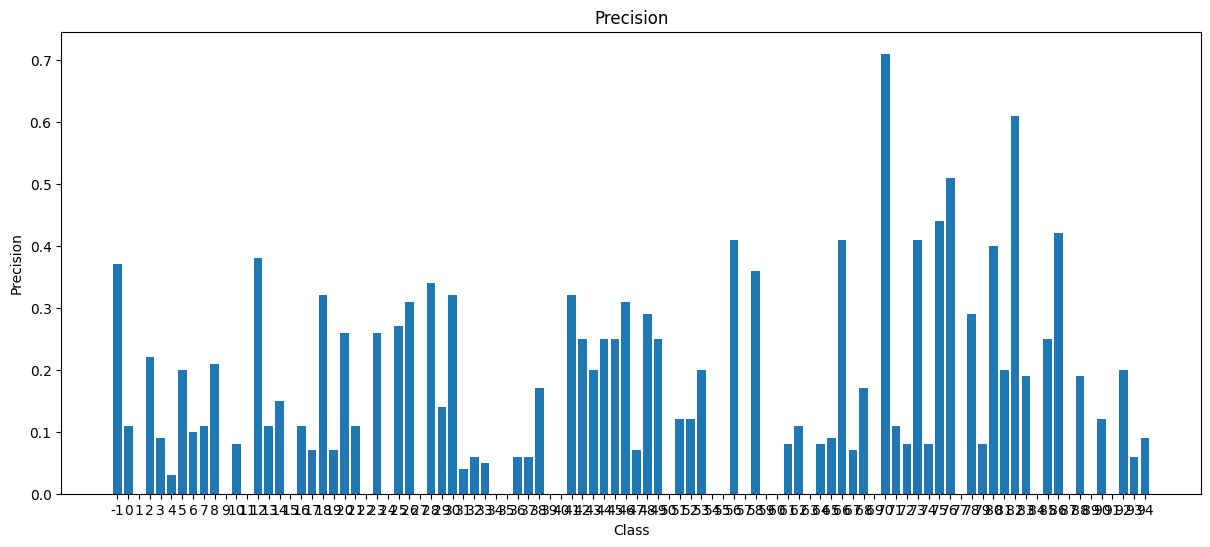

In [69]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

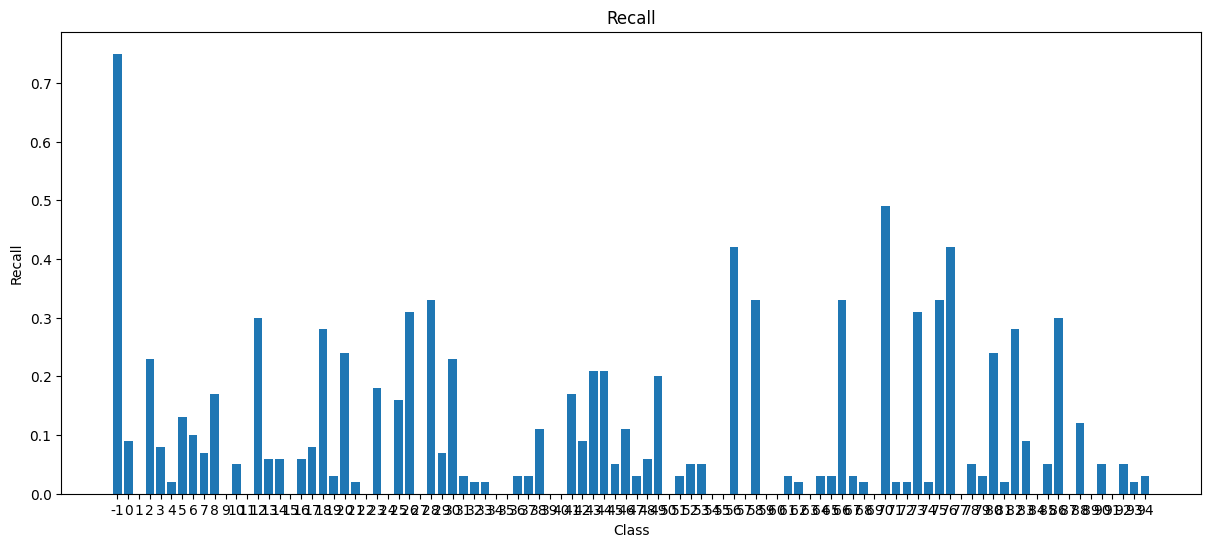

In [70]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

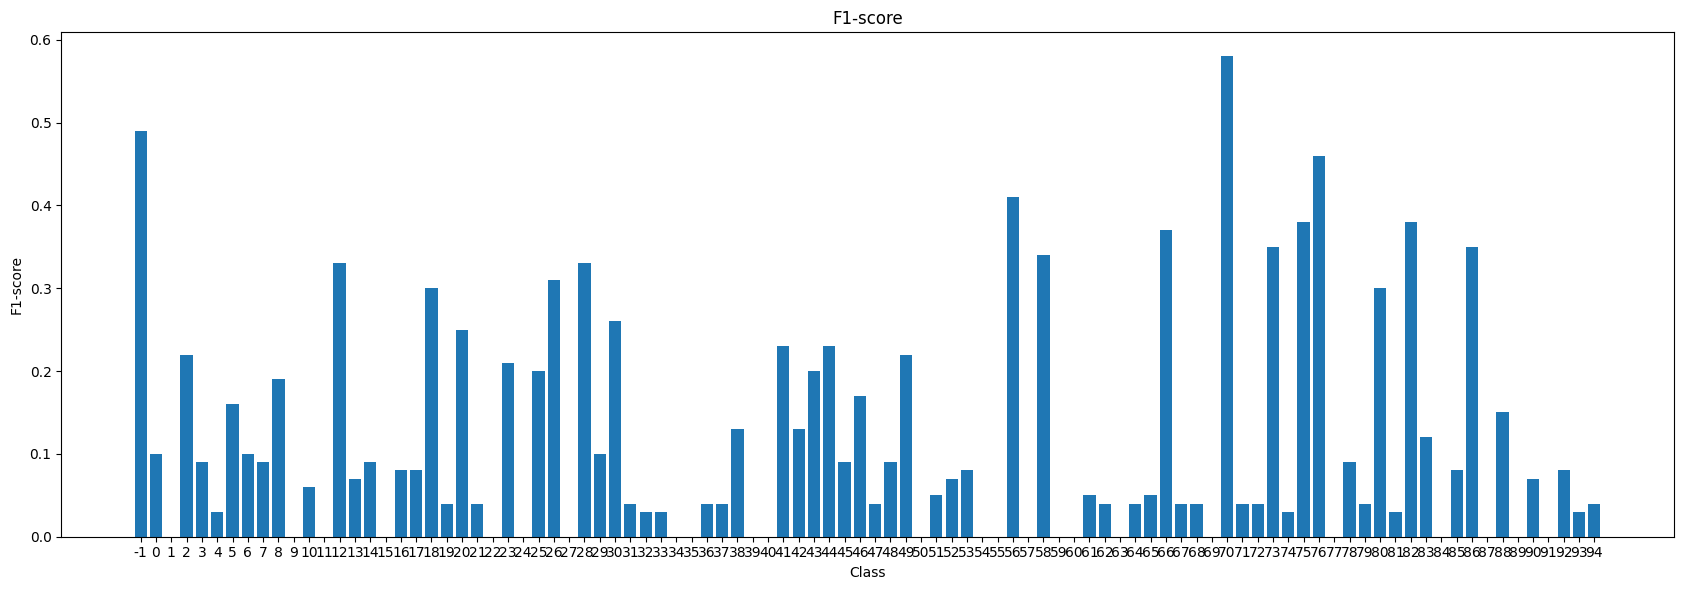

In [71]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()